1 Linear Least Squares Regression


442 10
(442,)


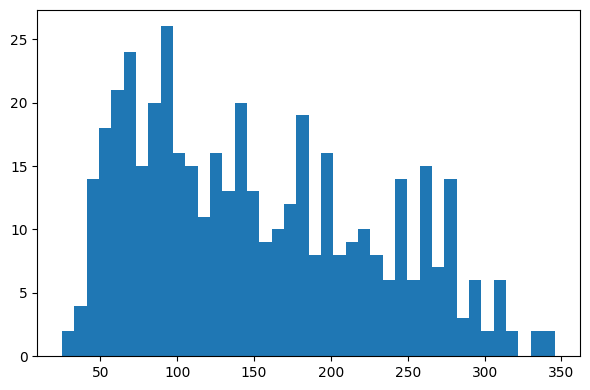

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
# Load data, inspect and do exploratory plots
#
diabetes = datasets.load_diabetes()
X = diabetes.data
t = diabetes.target
# Inspect sizes
#
NumData, NumFeatures = X.shape
print(NumData, NumFeatures) # 442 X 10
print(t.shape) # 442
# Plot and save
#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.hist(t, bins=40)
# ax[1].scatter(X[:,6], X[:,7], c='m', s=3)
# ax[1].grid(True)
plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")

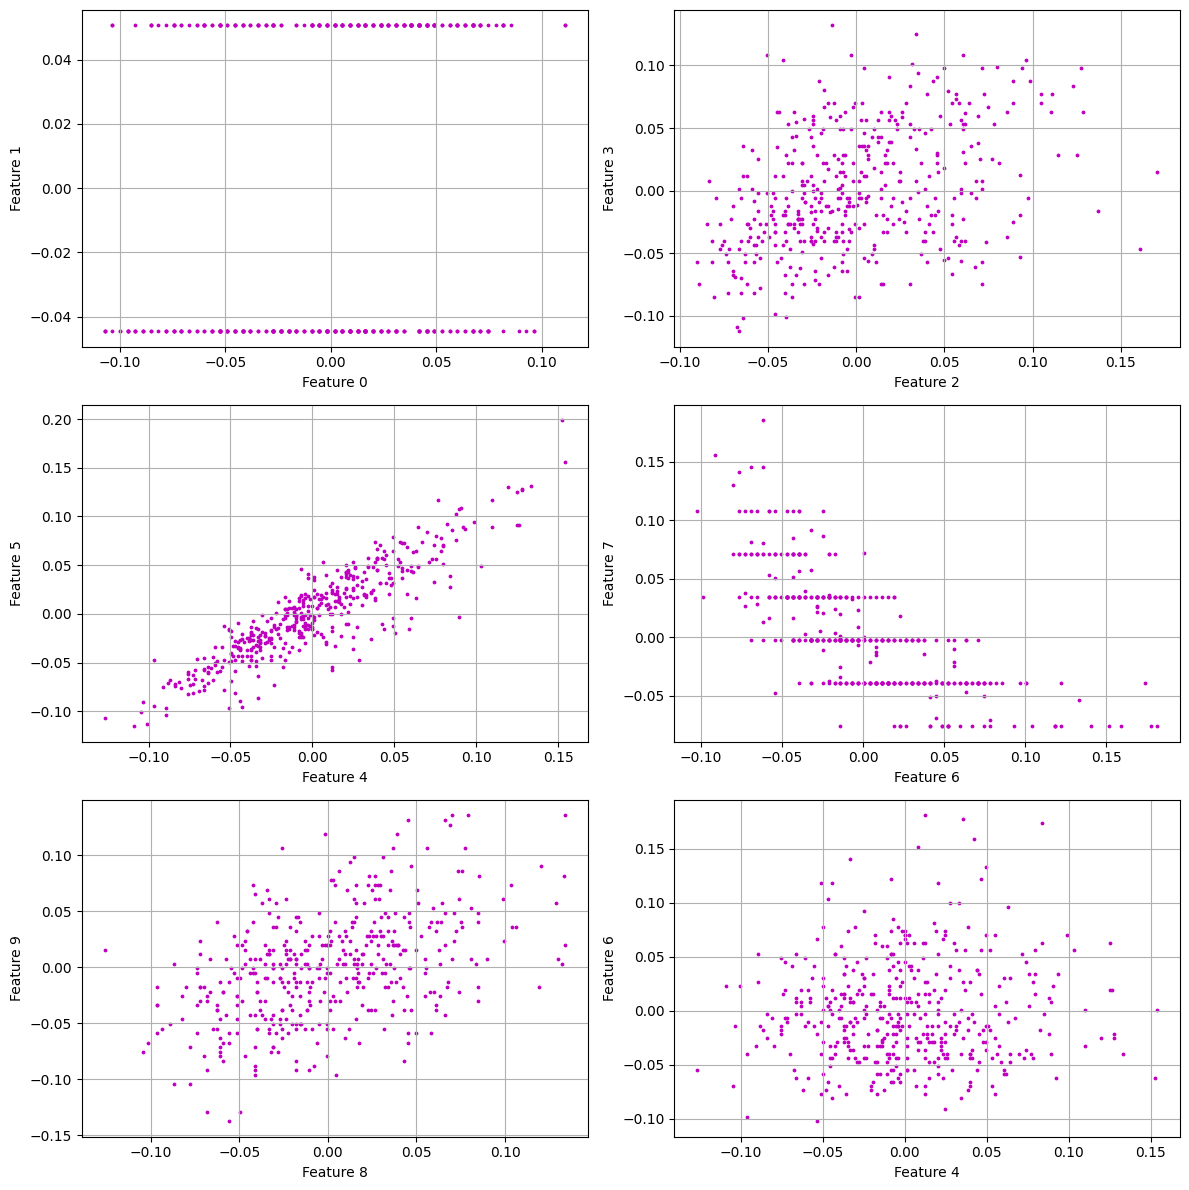

In [29]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Define feature pairs
feature_pairs = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (4,6)]

# Plot each feature pair
for idx, (i, j) in enumerate(feature_pairs):
    row = idx // 2
    col = idx % 2
    ax[row, col].scatter(X[:, i], X[:, j], c='m', s=3)
    ax[row, col].set_xlabel(f'Feature {i}')
    ax[row, col].set_ylabel(f'Feature {j}')
    ax[row, col].grid(True)

plt.tight_layout()
plt.show()


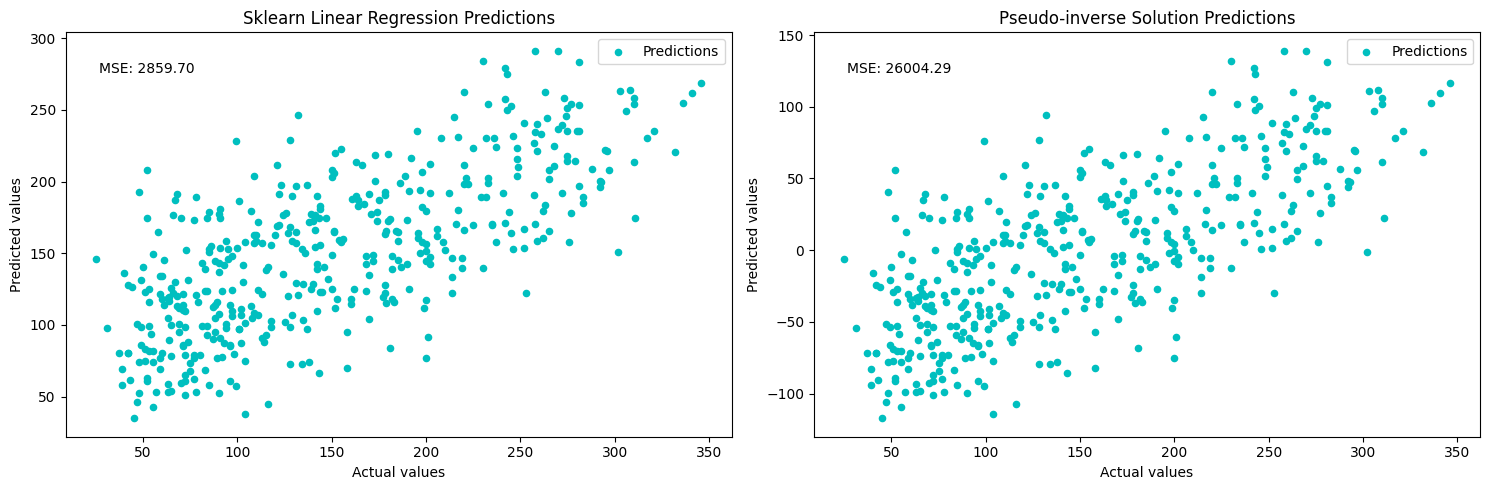

Mean Squared Error of sklearn: 2859.6963475867506
Mean Squared Error of Pseudo-inverse: 26004.293351128865


In [19]:
from sklearn.metrics import mean_squared_error

# Linear regression using sklearn
lin = LinearRegression()
lin.fit(X, t)
th1 = lin.predict(X)
mse_sklearn = mean_squared_error(t, th1)

# Pseudo-inverse solution to linear regression
w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w
mse_pseudo_inverse = mean_squared_error(t, th2)

# Plot predictions to check if they look the same!
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Plot for sklearn's LinearRegression
ax[0].scatter(t, th1, c='c', s=20, label='Predictions')
# ax[0].plot(t, t, c='r', label='Perfect Prediction Line')
ax[0].set_title('Sklearn Linear Regression Predictions')
ax[0].set_xlabel('Actual values')
ax[0].set_ylabel('Predicted values')
ax[0].legend()

# Plot for pseudo-inverse solution
ax[1].scatter(t, th2, c='c', s=20, label='Predictions')
# ax[1].plot(t, t, c='r', label='Perfect Prediction Line')
ax[1].set_title('Pseudo-inverse Solution Predictions')
ax[1].set_xlabel('Actual values')
ax[1].set_ylabel('Predicted values')
ax[1].legend()

# Annotating MSE values
ax[0].annotate(f"MSE: {mse_sklearn:.2f}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)
ax[1].annotate(f"MSE: {mse_pseudo_inverse:.2f}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10)

plt.tight_layout()
plt.show()

print("Mean Squared Error of sklearn:", mse_sklearn)
print("Mean Squared Error of Pseudo-inverse:", mse_pseudo_inverse)


2 Regularization

Tikhonov regularization (or L2) minimizes the mean squared error with a quadratic penalty
on the weights:

Mean Squared Error (L2 Regularized): 26067.285371503945
26067.285371503945
26004.293351128865


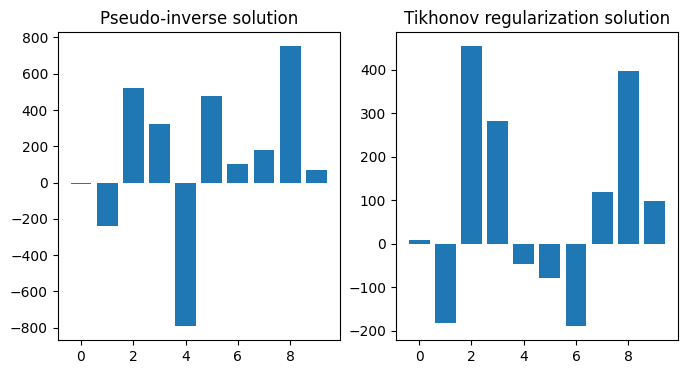

In [50]:
gamma = 0.21
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].bar(np.arange(len(w)), w)
ax[0].set_title('Pseudo-inverse solution')

ax[1].bar(np.arange(len(wR)), wR)
ax[1].set_title('Tikhonov regularization solution')

plt.savefig("LeastSquaresAndRegularizedWeights.jpg")

# Compute predictions for regularized solution (L2 method)
th_l2_regularized = X @ wR

# Compute MSE for L2 regularized solution
mse_l2_regularized = np.mean((t - th_l2_regularized)**2)

print("Mean Squared Error (L2 Regularized):", mse_l2_regularized)

mse_pseudo_inverse = mean_squared_error(t, th_l2_regularized)
mse_pseudo_inverse_ = mean_squared_error(t, th2)

print(mse_pseudo_inverse)
print(mse_pseudo_inverse_)




2995.0064888529414


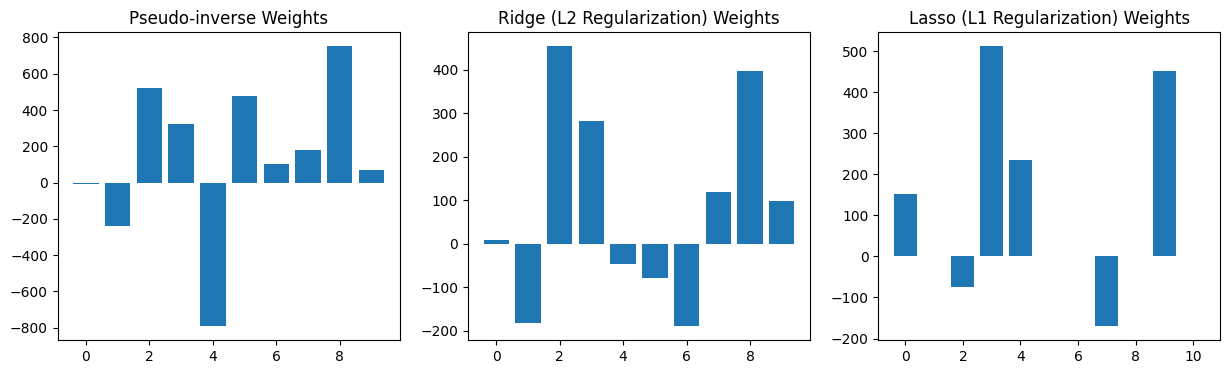

In [51]:
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(X, t)
th_lasso = ll.predict(X)
w_lasso = np.concatenate((ll.intercept_, ll.coef_), axis=None)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax[0].bar(np.arange(len(w)), w)
ax[0].set_title('Pseudo-inverse Weights')

ax[1].bar(np.arange(len(wR)), wR)
ax[1].set_title('Ridge (L2 Regularization) Weights')

ax[2].bar(np.arange(len(w_lasso)), w_lasso)
ax[2].set_title('Lasso (L1 Regularization) Weights')
#
plt.savefig("solutions.png")

mse_pseudo_inverse__ = mean_squared_error(t, th_lasso)
print(mse_pseudo_inverse__)



In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets
# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1 -1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the six are in two groups of three each)
# Xj= Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj= Z2 + 0.2*N(0,1) for j = 4,5,6.
N = 100
y = np.empty(0)
X = np.empty([0,6])
for i in range(N):
   Z1= np.random.randn()
   Z2= np.random.randn()
   y = np.append(y, 3*Z1 - 1.5*Z2 + 2*np.random.randn())
   Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2])+ np.random.randn(6)/5
   X = np.vstack ((X, Xarr.tolist()))

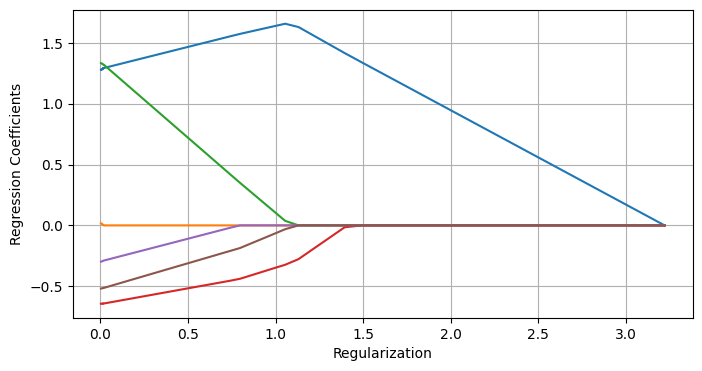

In [61]:
# Compute regressions with Lasso and return paths
#
alphas_lasso, coefs_lasso, _ = lasso_path(X, y)
# Plot each coefficient
#
fig, ax = plt.subplots(figsize = (8,4))
for i in range(6):
   ax.plot(alphas_lasso, coefs_lasso[i,:])
   ax.grid(True)
   ax.set_xlabel("Regularization")
   ax.set_ylabel("Regression Coefficients")

Computing regularization path using the LARS ...
.

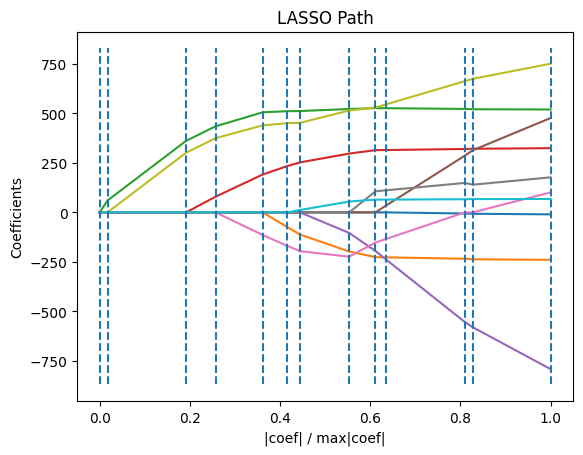

In [62]:
# Author: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#         Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()